In [57]:
# Importamos librerias
import pandas as pd
import seaborn as sns
import spacy
nlp = spacy.load("es_core_news_sm")
import numpy as np

In [58]:
politicES = pd.read_csv('./Corpus/normaliced_data/politicES.csv', index_col=0)
politicES

,tweets,genero,profesion,ideologia_binaria,ideologia_multiclase
0,feliz febrero andaluza andaluz andalucía donde...,0,2,0,0
1,feliz año nuevo feliz esperanzo querido allá ir,0,2,0,0
2,placer encontrar yo homólogo alemán compartir ...,0,2,0,0
3,conflicto ucrania haber suponer dramático para...,0,2,0,0
4,academia llingua asturiana realizar trabajo gr...,0,2,0,0
...,...,...,...,...,...
179995,inicio yo escalda militar inicio denunciamos é...,1,2,0,0
179996,menos minuto haber tratar analizar envío tanqu...,1,2,0,0
179997,fantasma recorrer euskal herria estado ser fan...,1,2,0,0
179998,aquí dejar reflexión hoy diario,1,2,0,0


In [59]:
from sklearn.model_selection import train_test_split
X = politicES["tweets"]
y = politicES[["genero", "profesion", "ideologia_binaria", "ideologia_multiclase"]]
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

print('X entrenamiento: {}, y entrenamiento: {}\nX prueba: {}, y prueba: {}'.format(X_train.shape,y_train.shape, X_test.shape, y_test.shape))

X entrenamiento: (144000,), y entrenamiento: (144000, 4)
X prueba: (36000,), y prueba: (36000, 4)


In [45]:

# Creamos el vectorizador y lo usamos para ajustarlo a nuestros datos.
def embeddings_with_spacy( tweets : pd.core.series.Series):
    embeddings = []
    # Getting the embedding vector for a document
    for message in tweets.values:
        doc = nlp(message)
        vector = doc.vector
        embeddings.append(vector)

    embeddings = np.array(embeddings)

    return pd.DataFrame(embeddings)
    #df_w2v['Labels'] = df['Labels'].values

X_train_embeddings = embeddings_with_spacy(X_train)
X_test_embeddings = embeddings_with_spacy(X_test)

In [49]:
X_train_embeddings.to_csv('./Corpus/splited_data/X_train.csv')
X_test_embeddings.to_csv('./Corpus/splited_data/X_test.csv')

In [60]:
y_train.to_csv('./Corpus/splited_data/y_train.csv', index=False)
y_test.to_csv('./Corpus/splited_data/y_test.csv', index = False)

<Axes: xlabel='genero', ylabel='count'>

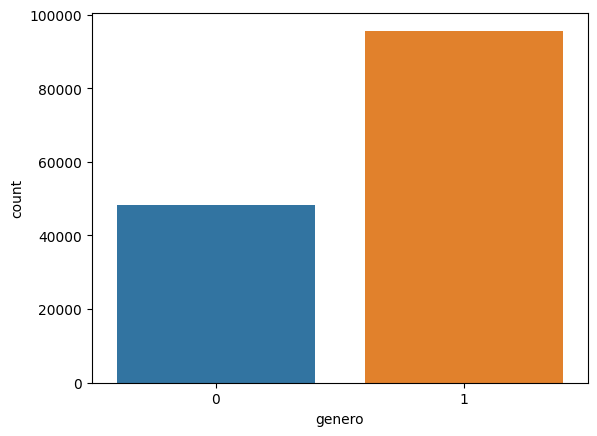

In [53]:
sns.countplot(x=y_train["genero"])

<Axes: xlabel='profesion', ylabel='count'>

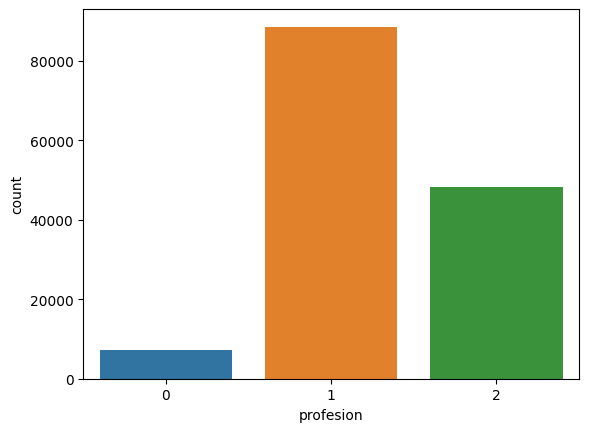

In [54]:
sns.countplot(x=y_train["profesion"])

<Axes: xlabel='ideologia_multiclase', ylabel='count'>

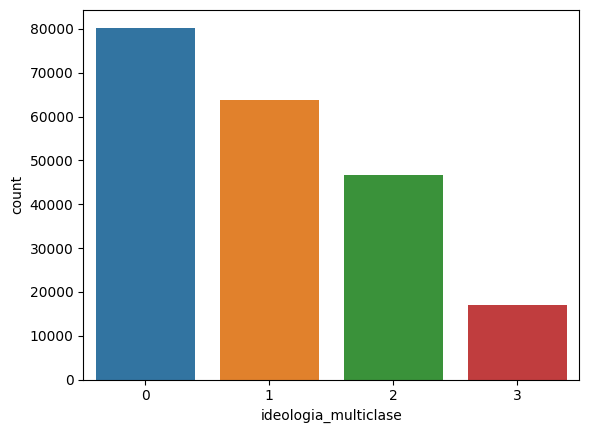

In [55]:
sns.countplot(x=y_train["ideologia_binaria"])

<Axes: xlabel='ideologia_multiclase', ylabel='count'>

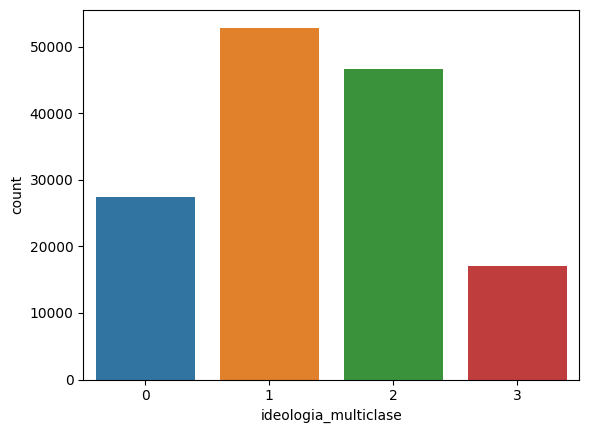

In [56]:
sns.countplot(x=y_train["ideologia_multiclase"])